## PRUEBA

In [1]:
import sqlite3
import csv
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS table_meteo (
        estacion INTEGER,
        Datetime DATE,
        DV REAL,
        HR REAL,
        P REAL,
        PB REAL,
        RS REAL,
        RU REAL,
        TEMP REAL,
        VV REAL
    )
''')

In [2]:
# Lista de archivos CSV a importar
archivos_csv = ['2019_METEO_pivot.csv', '2020_METEO_pivot.csv', '2021_METEO_pivot.csv', '2022_METEO_pivot.csv', 
                '2023_METEO_pivot.csv']

for archivo in archivos_csv:
    with open(archivo, 'r') as archivo_csv:
        csv_reader = csv.reader(archivo_csv)
        next(csv_reader)  # Omitir la primera fila si es un encabezado

        for fila in csv_reader:
            if len(fila) >= 10:
                cursor.execute('''
                    INSERT INTO table_meteo (estacion, Datetime, DV, HR, P, PB, RS, RU, TEMP, VV)
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                ''', (fila[0], fila[1], fila[2], fila[3], fila[4], fila[5], fila[6], fila[7], fila[8], fila[9]))
            else:
                print("Fila con menos de 10 elementos:", fila)

In [3]:
conn.commit()
conn.close()

In [4]:
import sqlite3
import csv
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()
cursor.execute('''
    CREATE TABLE IF NOT EXISTS table_calidad (
        estacion INTEGER,
        Datetime DATE,
        BEN REAL,
        CH4 REAL,
        CO REAL,
        EBE REAL,
        NMHC REAL,
        NO REAL,
        NO2 REAL,
        NOX REAL,
        O3 REAL,
        PM10 REAL,
        PM25 REAL,
        SO2 REAL,
        TCH REAL,
        TOL REAL
    )
''')

In [5]:
# Lista de archivos CSV a importar
archivos_csv = ['2019_AIRE_pivot.csv', '2020_AIRE_pivot.csv', '2021_AIRE_pivot.csv', '2022_AIRE_pivot.csv', 
                '2023_AIRE_pivot.csv']

for archivo in archivos_csv:
    with open(archivo, 'r') as archivo_csv:
        csv_reader = csv.reader(archivo_csv)
        next(csv_reader)  # Omitir la primera fila si es un encabezado

        for fila in csv_reader:
            if len(fila) >= 16:
                cursor.execute('''
                    INSERT INTO table_calidad (estacion, Datetime, BEN, CH4, CO, EBE, NMHC, NO, NO2, NOX, O3, 
                    PM10, PM25, SO2, TCH, TOL)
                    VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
                ''', (fila[0], fila[1], fila[2], fila[3], fila[4], fila[5], fila[6], fila[7], fila[8], fila[9], 
                      fila[10], fila[11], fila[12], fila[13], fila[14], fila[15]))
            else:
                print("Fila con menos de 16 elementos:", fila)

In [6]:
conn.commit()
conn.close()

## UNIÓN DE LAS DOS TABLAS

In [7]:
import sqlite3
import csv
# Conectar a la base de datos SQLite
conn = sqlite3.connect('mi_base_de_datos.db')
cursor = conn.cursor()

In [8]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS tabla_combinada AS
SELECT table_meteo.estacion, table_meteo.Datetime, table_meteo.DV, table_meteo.HR, table_meteo.P, table_meteo.PB, 
table_meteo.RS, table_meteo.RU, table_meteo.TEMP, table_meteo.VV, table_calidad.BEN, table_calidad.CH4, 
table_calidad.CO, table_calidad.EBE, table_calidad.NMHC, table_calidad.NO, table_calidad.NO2, table_calidad.NOX, 
table_calidad.O3, table_calidad.PM10, table_calidad.PM25, table_calidad.SO2, table_calidad.TCH, table_calidad.TOL 

FROM table_meteo
JOIN table_calidad ON table_meteo.estacion = table_calidad.estacion 
AND table_meteo.Datetime = table_calidad.Datetime;
''')

In [9]:
cursor.execute("SELECT * FROM tabla_combinada WHERE Datetime = '2019-02-01'")

In [10]:
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

(4, '2019-02-01', '', '', '', '', '', '', 7.0, '', '', '', 0.3, '', '', 5.0, 18.0, 26.0, '', '', '', 13.0, '', '')
(8, '2019-02-01', '', 83.0, '', '', '', '', 6.8, '', 0.1, 1.49, 0.1, 0.1, 0.05, 15.0, 44.0, 67.0, 56.0, 8.0, 4.0, 7.0, 1.54, 0.2)
(16, '2019-02-01', '', 82.0, '', '', '', '', '', '', '', '', 0.3, '', '', 4.0, 25.0, 31.0, 44.0, '', '', '', '', '')
(18, '2019-02-01', '', '', '', '', '', '', 7.6, '', 0.3, '', 0.3, 0.1, '', 3.0, 14.0, 18.0, 72.0, 5.0, '', 8.0, '', 0.5)
(24, '2019-02-01', 225.0, 87.0, 7.0, 922.0, 97.0, 6.0, 6.2, 4.38, 0.2, 1.16, 0.2, 0.1, 0.07, 1.0, 3.0, 5.0, 77.0, 2.0, 2.0, 4.0, 1.23, 0.1)
(35, '2019-02-01', '', 81.0, '', '', '', '', 7.1, '', '', '', 0.4, '', '', 5.0, 12.0, 20.0, 68.0, '', '', 11.0, '', '')
(36, '2019-02-01', '', 84.0, '', '', '', '', 6.5, '', '', '', 0.2, '', '', 6.0, 26.0, 35.0, '', 7.0, '', 4.0, '', '')
(38, '2019-02-01', '', 84.0, '', '', '', '', 6.2, '', 0.3, '', '', 0.1, '', 7.0, 18.0, 28.0, '', 6.0, 3.0, 8.0, '', 0.4)
(39, '2019-02-01',

In [17]:
cursor.execute("SELECT * FROM tabla_combinada WHERE estacion = '18' LIMIT 5")
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

In [18]:
resultados = cursor.fetchall()
for fila in resultados:
    print(fila)

(18, '2019-01-01', '', '', '', '', '', '', 5.6, '', 0.7, '', 0.9, 0.3, '', 76.0, 63.0, 179.0, 10.0, '', '', 18.0, '', 1.8)
(18, '2019-01-02', '', '', '', '', '', '', 5.1, '', 0.6, '', 0.8, 0.5, '', 88.0, 75.0, 210.0, 4.0, '', '', 16.0, '', 3.0)
(18, '2019-01-03', '', '', '', '', '', '', 5.9, '', 0.6, '', 0.8, 0.6, '', 82.0, 71.0, 197.0, 9.0, 27.0, '', 15.0, '', 3.2)
(18, '2019-01-04', '', '', '', '', '', '', 5.1, '', 0.7, '', 0.9, 0.8, '', 119.0, 86.0, 268.0, 4.0, 34.0, '', 18.0, '', 4.0)
(18, '2019-01-05', '', '', '', '', '', '', 4.6, '', 0.6, '', 0.8, 0.5, '', 73.0, 71.0, 184.0, 4.0, 25.0, '', 15.0, '', 2.3)


In [9]:
conn.commit()
conn.close()

## EXPORTAR A CSV

In [10]:
import sqlite3
import pandas as pd

In [11]:
conn = sqlite3.connect('mi_base_de_datos.db')

In [12]:
consulta_sql = 'SELECT * FROM tabla_combinada'

In [13]:
df = pd.read_sql_query(consulta_sql, conn)

In [14]:
conn.close()

In [15]:
df.to_csv('tabla_combinada.csv', index=False)

## LECTURA DE LA TABLA EN FORMATO CSV

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('tabla_combinada.csv', encoding='latin-1', sep=',')

In [3]:
data

,estacion,Datetime,DV,HR,P,PB,RS,RU,TEMP,VV,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
0,4,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,4.5,NaN,...,NaN,105.0,71.0,232.0,NaN,NaN,NaN,18.0,NaN,NaN
1,4,2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,163.0,84.0,334.0,NaN,NaN,NaN,20.0,NaN,NaN
2,4,2019-01-03,NaN,NaN,NaN,NaN,NaN,NaN,4.3,NaN,...,NaN,125.0,77.0,269.0,NaN,NaN,NaN,18.0,NaN,NaN
3,4,2019-01-04,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN,...,NaN,142.0,86.0,304.0,NaN,NaN,NaN,19.0,NaN,NaN
4,4,2019-01-05,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,...,NaN,108.0,75.0,241.0,NaN,NaN,NaN,18.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21182,59,2023-07-27,0.0,40.0,0.0,937.0,334.0,0.0,26.6,1.46,...,0.0,2.0,22.0,25.0,100.0,NaN,NaN,NaN,0.0,NaN
21183,59,2023-07-28,8.0,38.0,0.0,937.0,331.0,0.0,27.3,1.38,...,0.0,4.0,21.0,28.0,100.0,NaN,NaN,NaN,0.0,NaN
21184,59,2023-07-29,12.0,38.0,0.0,937.0,335.0,0.0,27.7,1.23,...,0.0,1.0,19.0,21.0,75.0,NaN,NaN,NaN,0.0,NaN
21185,59,2023-07-30,1.0,40.0,0.0,939.0,333.0,0.0,29.1,1.12,...,0.0,2.0,17.0,20.0,78.0,NaN,NaN,NaN,0.0,NaN


In [4]:
df = pd.DataFrame(data)

In [5]:
df.shape

(21187, 24)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum().sum()

208664

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   estacion  21187 non-null  int64  
 1   Datetime  21187 non-null  object 
 2   DV        6493 non-null   float64
 3   HR        18136 non-null  float64
 4   P         8152 non-null   float64
 5   PB        4858 non-null   float64
 6   RS        4933 non-null   float64
 7   RU        16921 non-null  float64
 8   TEMP      18951 non-null  float64
 9   VV        6520 non-null   float64
 10  BEN       6447 non-null   float64
 11  CH4       13294 non-null  float64
 12  CO        10233 non-null  float64
 13  EBE       6385 non-null   float64
 14  NMHC      13294 non-null  float64
 15  NO        21110 non-null  float64
 16  NO2       21110 non-null  float64
 17  NOX       21110 non-null  float64
 18  O3        15404 non-null  float64
 19  PM10      9610 non-null   float64
 20  PM25      6426 non-null   fl

In [9]:
nan_count = df.isnull().sum().sum()
print(nan_count)

208664


In [10]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,6493.000000,18136.000000,8152.000000,4858.000000,4933.000000,16921.000000,18951.000000,6520.000000,6447.000000,...,13294.000000,21110.000000,21110.000000,21110.000000,15404.000000,9610.000000,6426.000000,8338.000000,13294.000000,6431.000000
mean,34.755463,98.428769,56.689843,0.918885,944.964389,201.490168,0.389161,16.262947,1.348681,0.351823,...,0.011178,11.757224,28.888205,46.907011,52.558565,18.557648,9.761905,6.063325,0.151604,1.633525
std,18.151083,98.491209,18.774465,3.226149,6.722274,101.523691,2.987349,7.846315,0.653209,0.292532,...,0.037123,18.691801,17.592303,44.143814,23.171959,13.927262,6.128935,3.886827,0.442661,1.531241
min,4.000000,0.000000,16.000000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,8.000000,41.000000,0.000000,940.000000,110.000000,0.000000,10.000000,0.910000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.000000,10.000000,6.000000,3.000000,0.000000,0.700000
50%,36.000000,64.000000,56.000000,0.000000,945.000000,197.000000,0.000000,15.200000,1.190000,0.300000,...,0.000000,5.000000,25.000000,33.000000,54.000000,16.000000,9.000000,5.000000,0.000000,1.200000
75%,54.000000,197.000000,71.000000,0.000000,949.000000,297.000000,0.000000,22.600000,1.600000,0.500000,...,0.000000,12.000000,38.000000,57.000000,70.562500,23.000000,12.000000,8.000000,0.000000,2.100000
max,59.000000,359.000000,100.000000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


In [12]:
import matplotlib.pyplot as plt

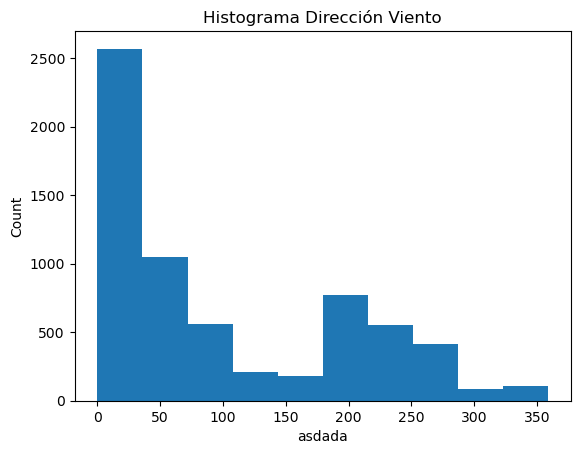

In [13]:
plt.hist(df.DV, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

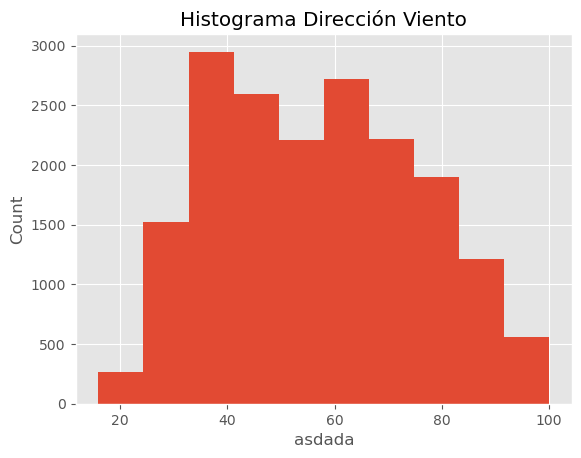

In [14]:
plt.hist(df.HR, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

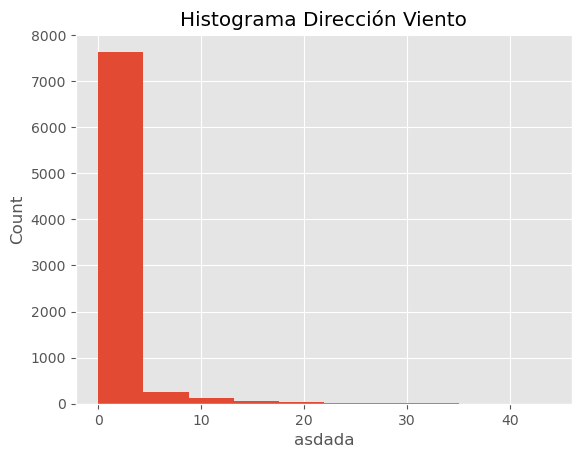

In [15]:
plt.hist(df.P, bins=10)
plt.title("Histograma Dirección Viento")
plt.xlabel("asdada")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.style.use('ggplot')
plt.show()

In [17]:
import pandas as pd
import math

In [18]:
def fill_na(row, col):
    if math.isnan(row[col]):
        value = df[df['Datetime'] == row['Datetime']][col].mean()
    else:
        value = row[col]
    return value

col_to_fill = 'DV'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [19]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,21187.000000,18136.000000,8152.000000,4858.000000,4933.000000,16921.000000,18951.000000,6520.000000,6447.000000,...,13294.000000,21110.000000,21110.000000,21110.000000,15404.000000,9610.000000,6426.000000,8338.000000,13294.000000,6431.000000
mean,34.755463,99.496897,56.689843,0.918885,944.964389,201.490168,0.389161,16.262947,1.348681,0.351823,...,0.011178,11.757224,28.888205,46.907011,52.558565,18.557648,9.761905,6.063325,0.151604,1.633525
std,18.151083,85.401593,18.774465,3.226149,6.722274,101.523691,2.987349,7.846315,0.653209,0.292532,...,0.037123,18.691801,17.592303,44.143814,23.171959,13.927262,6.128935,3.886827,0.442661,1.531241
min,4.000000,0.000000,16.000000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,26.000000,41.000000,0.000000,940.000000,110.000000,0.000000,10.000000,0.910000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.000000,10.000000,6.000000,3.000000,0.000000,0.700000
50%,36.000000,67.750000,56.000000,0.000000,945.000000,197.000000,0.000000,15.200000,1.190000,0.300000,...,0.000000,5.000000,25.000000,33.000000,54.000000,16.000000,9.000000,5.000000,0.000000,1.200000
75%,54.000000,175.250000,71.000000,0.000000,949.000000,297.000000,0.000000,22.600000,1.600000,0.500000,...,0.000000,12.000000,38.000000,57.000000,70.562500,23.000000,12.000000,8.000000,0.000000,2.100000
max,59.000000,359.000000,100.000000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


In [20]:
col_to_fill = 'HR'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [21]:
col_to_fill = 'P'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [22]:
col_to_fill = 'PB'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [23]:
col_to_fill = 'RS'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [24]:
col_to_fill = 'RU'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [25]:
col_to_fill = 'TEMP'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [26]:
col_to_fill = 'VV'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [27]:
col_to_fill = 'BEN'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [28]:
col_to_fill = 'NMHC'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [29]:
col_to_fill = 'NO'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [30]:
col_to_fill = 'NO2'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [31]:
col_to_fill = 'NOX'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [32]:
col_to_fill = 'O3'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [33]:
col_to_fill = 'PM10'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [34]:
col_to_fill = 'PM25'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [35]:
col_to_fill = 'SO2'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [36]:
col_to_fill = 'TCH'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [37]:
col_to_fill = 'TOL'
df[col_to_fill] = df.apply(lambda row: fill_na(row, col_to_fill), axis=1)

In [38]:
df.describe()

,estacion,DV,HR,P,PB,RS,RU,TEMP,VV,BEN,...,NMHC,NO,NO2,NOX,O3,PM10,PM25,SO2,TCH,TOL
count,21187.000000,21187.000000,21187.00000,21187.000000,21187.000000,21187.000000,18307.000000,21187.000000,21187.000000,21187.000000,...,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000,21187.000000
mean,34.755463,99.496897,56.51347,0.932221,944.935196,202.836417,1.554633,16.215445,1.351665,0.353018,...,0.045705,11.750233,28.888158,46.896168,52.758002,18.747336,9.852854,5.545123,0.620543,1.641856
std,18.151083,85.401593,18.72845,3.174759,5.895263,101.512191,5.739964,7.819105,0.597078,0.261544,...,0.060462,18.665905,17.579328,44.091985,22.891531,13.295410,5.816517,3.210400,0.706456,1.334360
min,4.000000,0.000000,16.00000,0.000000,917.000000,13.000000,0.000000,-6.100000,0.130000,0.000000,...,0.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.100000
25%,18.000000,26.000000,41.00000,0.000000,941.333333,110.666667,0.000000,9.972727,0.940000,0.200000,...,0.000000,2.000000,16.000000,20.000000,35.727778,11.000000,6.000000,3.000000,0.000000,0.775000
50%,36.000000,67.750000,55.00000,0.000000,944.666667,199.333333,0.000000,15.000000,1.237500,0.275000,...,0.000000,5.000000,25.000000,33.000000,54.757778,16.166667,8.750000,5.000000,0.000000,1.225000
75%,54.000000,175.250000,71.00000,0.040000,948.666667,298.333333,0.000000,22.500000,1.610000,0.425000,...,0.090000,12.000000,38.000000,57.000000,70.847143,23.333333,12.500000,7.285714,1.385000,2.075000
max,59.000000,359.000000,100.00000,43.800000,965.000000,411.000000,50.000000,34.800000,6.040000,3.400000,...,0.430000,231.000000,148.000000,501.000000,120.000000,432.000000,83.000000,33.000000,2.590000,35.300000


In [40]:
import seaborn as sns

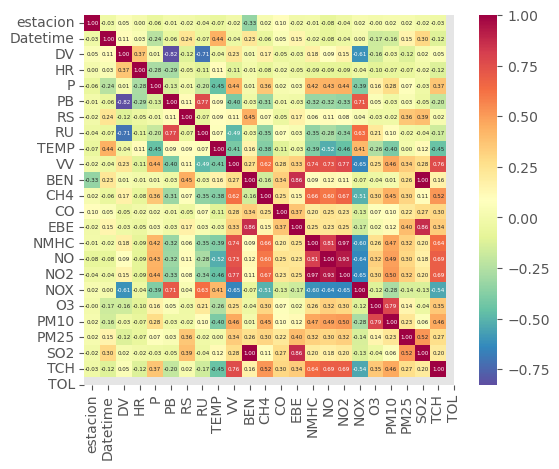

In [41]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 4}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.style.use('ggplot')

plt.show()

In [42]:
plt.savefig('matriz_correlacion.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

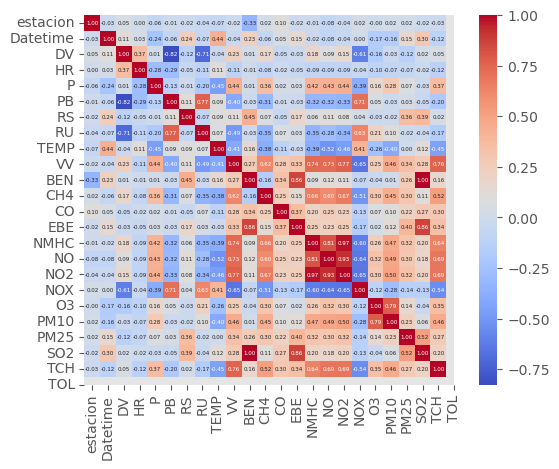

In [58]:
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 4}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="coolwarm")
plt.style.use('ggplot')

plt.show()

In [48]:
plt.savefig('matriz_correlacion.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

In [49]:
df_correlation = pd.DataFrame(corrmat)

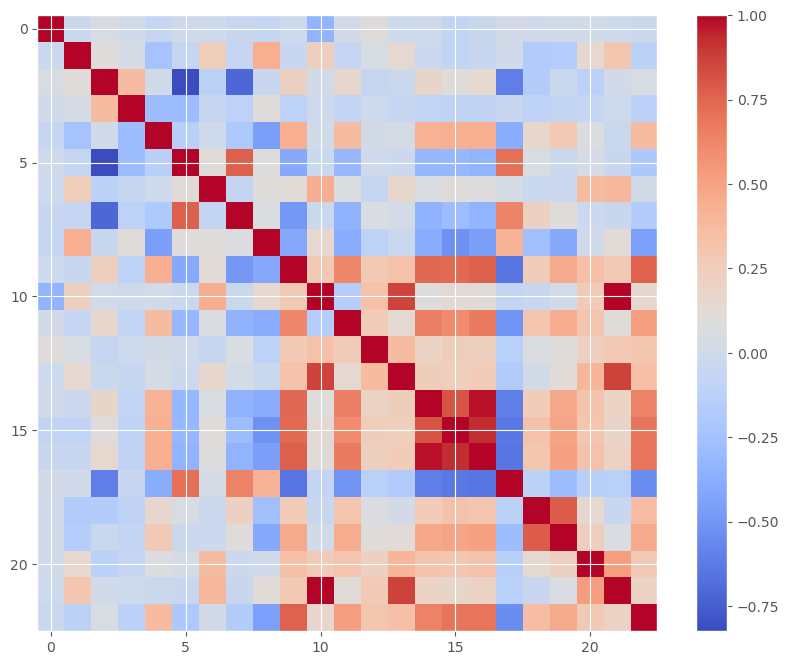

In [50]:
plt.figure(figsize=(10, 8))
plt.imshow(df_correlation, cmap='coolwarm', interpolation='nearest', aspect='auto')
plt.colorbar()

In [51]:
plt.savefig('matriz_correlacion.png', format='png', dpi=300, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

Text(0.5, 1.0, 'Matriz de Correlación')

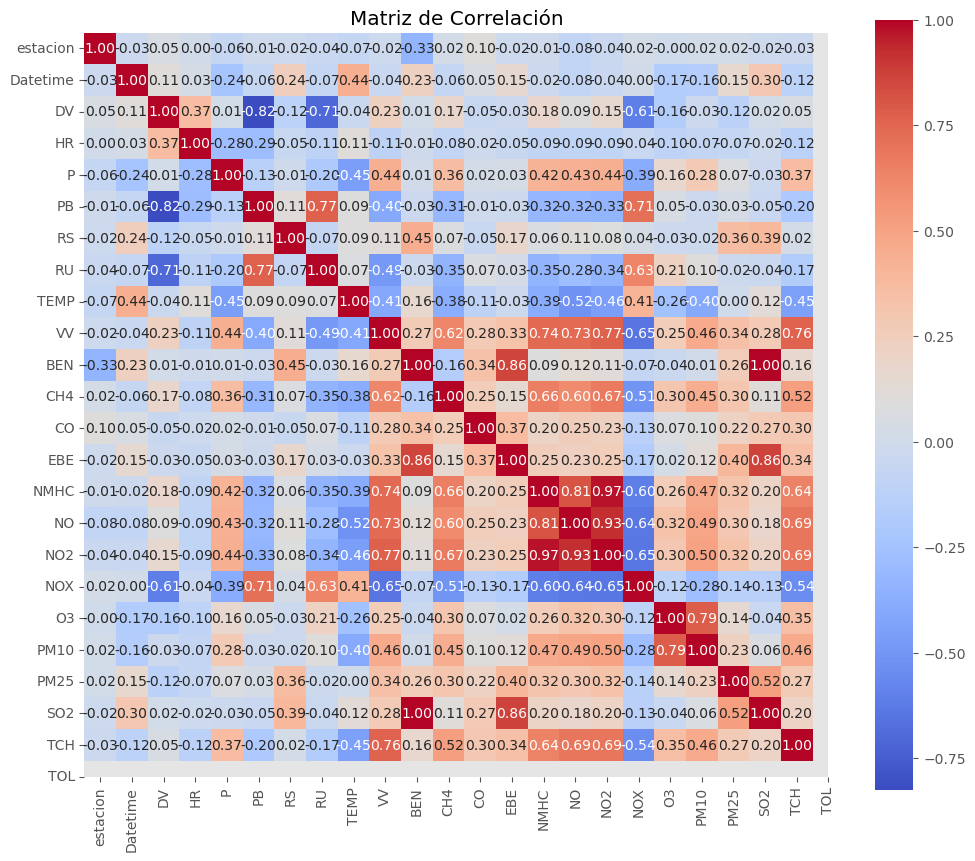

In [64]:
corrmat = df.corr()
plt.figure(figsize=(12, 10))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10},  # Ajusta el tamaño de los valores anotados
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="coolwarm")

plt.title('Matriz de Correlación')  # Agrega un título

In [62]:
plt.savefig('matriz_correlacion.png', format='png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In [65]:
plt.show()